#  gradient descent
- it is an algorithm that finds the minimum value of a function by taking small steps in the opposite direction of the gradient.

gradient descent is of three types:
- batch gradient descent
- stochastic gradient descent
- mini batch gradient descent

# here we are leaning about Batch gradient descent (for 2 D data)
## Batch gradient descent is when we take whole columns as once 
- it is rarely used 
- it is used when we have convex data
- this is slow 

In [1]:
from sklearn.datasets import make_regression

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

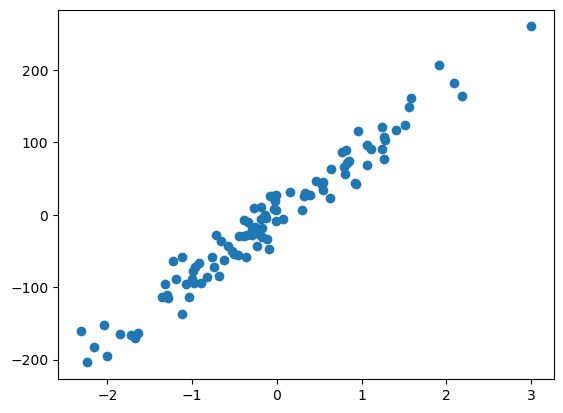

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr=LinearRegression()

In [7]:
lr.fit(X,y)
print(lr.coef_) #slope  denoted by m
print(lr.intercept_)  #it is b  (it is our actual b)

[85.51400017]
0.24960493246976334


# now make class to apply gradiend descent
- take m as constant taking the above we get

In [8]:
class GDregressor:

    def __init__(self,learning_rate,epochs):
        self.m=9.84
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self,X,y):
        # calculating b using GD
        for i in range(self.epochs):
            loss_slope= -2*np.sum(y-self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
        print(self.b)


In [9]:
gd=GDregressor(0.001,90)

In [10]:
gd.fit(X,y)  # almost equals to actual

-7.6369026101288435


# now changing values of both b and m

In [11]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np 

In [12]:
X,y=make_regression(n_features=1,n_samples=100,n_informative=1,n_targets=1,noise=20,random_state=13)

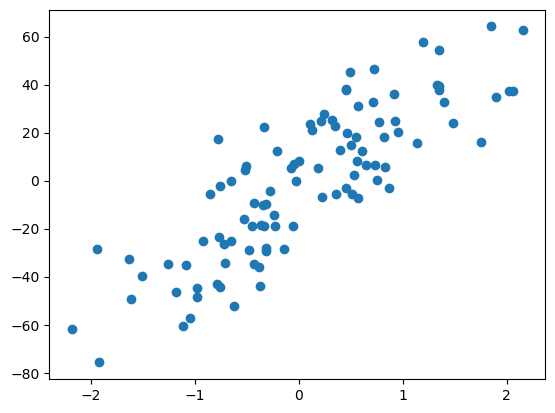

In [13]:
 plt.scatter(X, y)


In [14]:
# b=-120
# m=10
# lr=0.001
# all_b=[]
# all_m=[]
# all_cost=[]
# epochs=30

# for i in range(epochs):
#     slope_b=0
#     slope_m=0
#     cost=0
#     for j in range(X.shape[0]):
#         slope_b +=  - 2*(y[j] - (m * X[j,0]) -  b)
#         slope_m +=  - 2*(y[j] - (m * X[j,0]) -  b)*X[j,0]
#         cost = cost + (y[j] - m * X[j,0] -b) ** 2

# b = b - (lr * slope_b)
# m = m - (lr * slope_m)
# all_b.append(b)
# all_m.append(m)
# all_cost.append(cost)

## using this code because i want to show each line in my graph through animation

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
print(lr.coef_) #slope  denoted by m
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [16]:
class GDregressor:

    def __init__(self,learning_rate,epochs):
        self.m=10
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self,X,y):
        # calculating b  and m using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b


In [17]:
gd=GDregressor(0.001,90)

In [18]:
gd.fit(X,y)

27.82809226442274 -2.294745177805194


# for multidimensional data

In [19]:
from sklearn.datasets import load_diabetes

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [21]:
X,y=load_diabetes(return_X_y=True)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [25]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568969

In [26]:
X_train.shape

(353, 10)